# Individual Question - Why do some international movies flop?

**Taylor Stanley**

**Full-Time**

**Scheduled Project Review: Wed Jun 24, 2020 11am – 11:45am**

**Abhineet Kulkarni**

**BLOG POST URL: https://medium.com/@tcastanley/movie-analysis-why-do-some-international-movies-flop-287db1792cca?sk=aef5c279f461a2868fb17bc2530d6036**

# Set up Notebook & Import Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df_movie_money = pd.read_csv('CLEAN-BOM_budget_revenues.csv')
df_movie_money = df_movie_money.drop('Unnamed: 0', axis=1)
df_movie_money.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [5]:
df_title_country = pd.read_csv('CLEAN-title_countrylist_count.csv')
df_title_country = df_title_country.drop('Unnamed: 0', axis=1)
df_title_country.head()

,primary_title,country_list,country_count
0,!Women Art Revolution,"['Russian Federation', 'United States']",2
1,#1 Serial Killer,['United States'],1
2,#5,['United States'],1
3,#50Fathers,['United States'],1
4,#66,['Indonesia'],1


## Merge Datasets

**Merging two previously cleaned data sets together to continue further analysis.**

In [6]:
df_money_country_combined = df_movie_money.merge(df_title_country, on='primary_title')
print(df_money_country_combined.shape)
df_money_country_combined.head()

(2312, 7)


,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31


# Data Cleaning & Feature Engineering

**- Add Foreign Gross Feature**

**- Add Net Revenue Feature**

**- Add Return on Investment Feature**

In [7]:
df_money_country_combined['foreign_gross'] = df_money_country_combined[
    'worldwide_gross'] - df_money_country_combined['domestic_gross']

df_money_country_combined['net_revenue'] = df_money_country_combined[
    'worldwide_gross'] - df_money_country_combined['production_budget']

df_money_country_combined['return_on_investment'] = (
    (df_money_country_combined[
        'worldwide_gross'] - df_money_country_combined[
        'production_budget'])/df_money_country_combined[
        'production_budget'])
df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114


**- Add Profit/Loss Feature**

In [8]:
def profit_loss_function(ROI):
    
    '''This function takes in an ROI and determins if it value constitues a 
    profit or a loss on a particular investment.
    
    Returns:
    str 'profit' or 'loss'
    
    Eg:
    INPUT:
    profit_loss_function(1.5)
    
    OUTPUT:
    'profit'
    '''
    
    if ROI == 0:
        x = 'break-even'
    if ROI > 0:
        x = 'Profit'
    else:
        x = 'Loss'
    return x
df_money_country_combined['profit/loss'] = df_money_country_combined['return_on_investment'].map(lambda x: profit_loss_function(x))
df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit


**- Add Country Count Category Feature**

In [9]:
def country_count_category(value):
    '''This function is meant to be mapped along a DataFrame series.  It is 
    specifically meant to take in a country_count value from a dataframe and 
    assigns it to the appropriate category.  These categories can be 
    manipulated as needed, see the commented out potential changes below.
    
    Returns:
    Assigned categorical value
    
    Example:
    df['country_count'].map(lambda x: country_count_category(x))'''
    
    if value <=10:
        value = '2 - 10'
    elif value > 10 and value <= 20:
        value = '11 - 20'
    elif value > 20 and value <= 30:
        value = '21 - 30'
    elif value > 30 and value <= 40:
        value = '31 - 40'
    else: 
#         value > 40 and value <= 50:
        value = '41 +'
#     elif value > 50 and value <= 60:
#         value = '51 - 60'
#     else: 
#         value = '61 +'
    return value
    
df_money_country_combined['country_count_category'] = df_money_country_combined['country_count'].map(lambda x: country_count_category(x))
df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit,2 - 10
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit,31 - 40
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss,31 - 40
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit,31 - 40
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit,31 - 40


In [10]:
df_money_country_combined.describe()

,production_budget,domestic_gross,worldwide_gross,country_count,foreign_gross,net_revenue,return_on_investment
count,2.312000e+03,2.312000e+03,2.312000e+03,2312.000000,2.312000e+03,2.312000e+03,2312.000000
mean,3.616620e+07,4.542157e+07,1.094395e+08,16.823529,6.401789e+07,7.327325e+07,2.938161
std,4.975889e+07,7.692804e+07,2.125942e+08,11.901914,1.419744e+08,1.765303e+08,15.251251
min,1.400000e+03,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,-2.002376e+08,-1.000000
25%,5.000000e+06,6.330352e+05,2.507176e+06,4.000000,6.354900e+04,-2.000000e+06,-0.649132
50%,1.800000e+07,1.847207e+07,3.147508e+07,18.000000,9.988500e+06,1.088659e+07,0.664908
75%,4.462500e+07,5.476247e+07,1.099793e+08,27.000000,5.684128e+07,7.053940e+07,2.699245
max,4.250000e+08,7.605076e+08,2.776345e+09,47.000000,2.015838e+09,2.351345e+09,415.564740


## Final Step of Cleaning

**- Remove rows without any usable financial data.**

In [11]:
df_money_country_combined = df_money_country_combined[(df_money_country_combined['worldwide_gross'] != 0)
                                  &
                                  (df_money_country_combined['domestic_gross'] != 0)]

df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit,2 - 10
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit,31 - 40
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss,31 - 40
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit,31 - 40
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit,31 - 40


# Data Exploration Analysis & Visualization

## A Mean vs. Median Look at Our Data

In [12]:
df_money_country_combined.groupby('profit/loss').median()

,production_budget,domestic_gross,worldwide_gross,country_count,foreign_gross,net_revenue,return_on_investment
profit/loss,,,,,,,
Loss,14000000.0,2000000.0,4221341.0,11,511993.0,-6283172.0,-0.645164
Profit,27250000.0,42901464.5,82212396.5,25,37471168.0,49355515.5,2.075303


In [13]:
df_money_country_combined.groupby('profit/loss').mean()

,production_budget,domestic_gross,worldwide_gross,country_count,foreign_gross,net_revenue,return_on_investment
profit/loss,,,,,,,
Loss,2.367195e+07,7.006051e+06,1.280020e+07,11.946274,5.794153e+06,-1.087175e+07,-0.601145
Profit,4.769707e+07,7.100715e+07,1.724806e+08,21.046414,1.014734e+08,1.247835e+08,5.195709


## What is the Distribution of Movies that are Profitable?

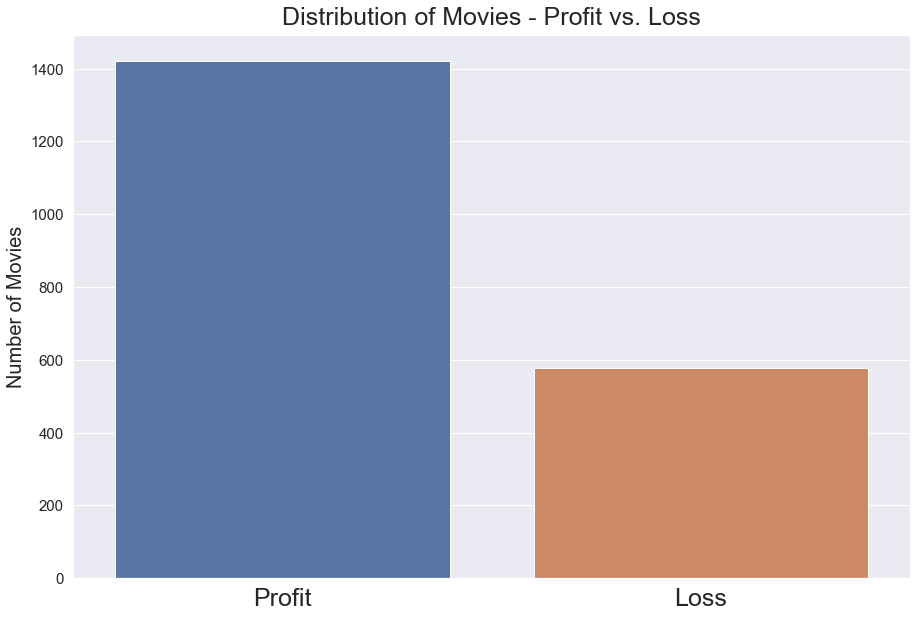

In [15]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')

sns.countplot(x=df_money_country_combined['profit/loss']);

plt.xlabel('')
plt.xticks(fontsize=25)
plt.ylabel('Number of Movies', fontsize=20)
plt.yticks(fontsize=15)
plt.title('Distribution of Movies - Profit vs. Loss', fontsize=25, pad=10);

## What are the Median Net Revenue of each?

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


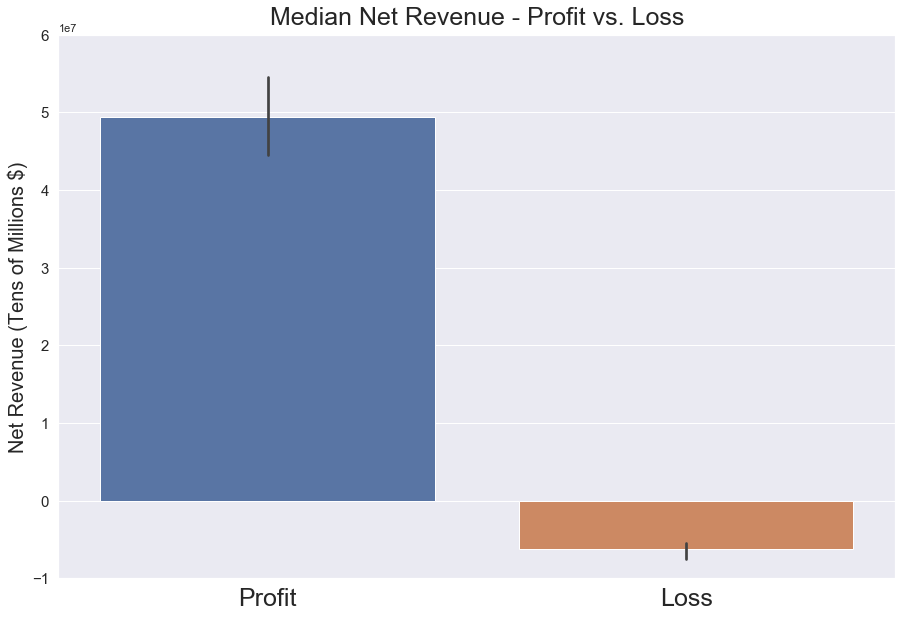

In [14]:
plt.figure(figsize=(15,10))

sns.barplot(x=df_money_country_combined['profit/loss'],
            y=df_money_country_combined['net_revenue'],
            estimator=np.median);

plt.ylim(-1e7, 6e7)
plt.xlabel('');
plt.xticks(fontsize=25);
plt.ylabel('Net Revenue (Tens of Millions $)', fontsize=20);
plt.yticks(fontsize=15);
plt.title('Median Net Revenue - Profit vs. Loss', fontsize=25, pad=10);

**Ok, so we know that movies tend to be profitable more times than not, though who would keep making movies if that WASN'T the case?!  We can also observe that the median net revenue for a profitable movies can be very substantial.  Next, let's take a look at how these trends have been throughout recent history.**

## Movie Trends Over Time

In [15]:
latest_movie = df_money_country_combined['release_date'].max()
print(latest_movie)
earliest_movie = df_money_country_combined['release_date'].min()
print(earliest_movie)

def year_from_date(date):
    year = date.split('-')
    return year[0]

df_money_country_combined['release_date'] = df_money_country_combined['release_date'].map(lambda x: year_from_date(x))
df_money_country_combined.head()

2019-06-14
1915-02-08


,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
0,2009,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit,2 - 10
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit,31 - 40
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss,31 - 40
3,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit,31 - 40
4,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit,31 - 40


### Movie Releases Per Year

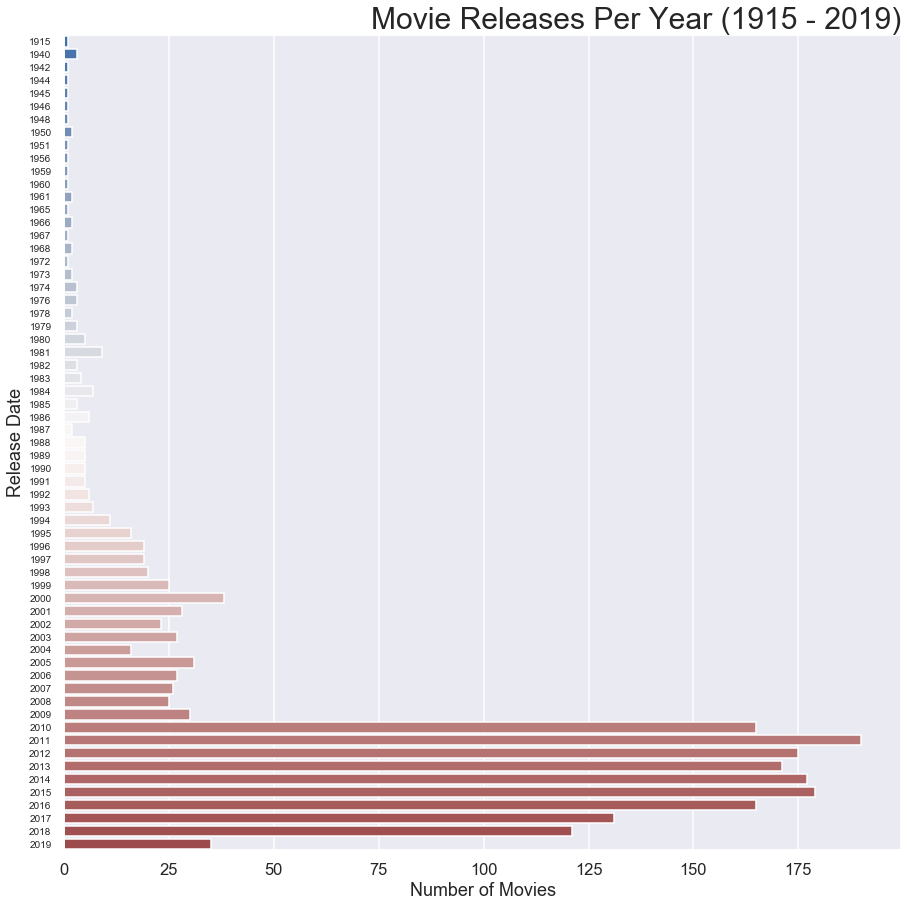

In [16]:
plt.figure(figsize=(15,15));
sns.set(context='talk')

palette = sns.light_palette("darkblue", n_colors=2)

sns.countplot(y=df_money_country_combined['release_date'].sort_values(ascending=False), orient='h', palette='vlag');

plt.xlabel('Number of Movies');
plt.ylabel('Release Date');
plt.yticks(fontsize=10);
plt.title('Movie Releases Per Year (1915 - 2019)', fontsize=30, loc='right');

**As we can see, there is a massive spike in information available for movies made after 2010.  Let's take a look at data since the year 2000 though and give ourselves a better sample size.**

### Movies Released Between 2000 - 2019

In [17]:
df_money_country_combined['release_date'] = df_money_country_combined['release_date'].astype(int)
df_money_country_combined = df_money_country_combined[df_money_country_combined['release_date'] >= 2000]
df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
0,2009,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit,2 - 10
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit,31 - 40
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss,31 - 40
3,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit,31 - 40
4,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit,31 - 40


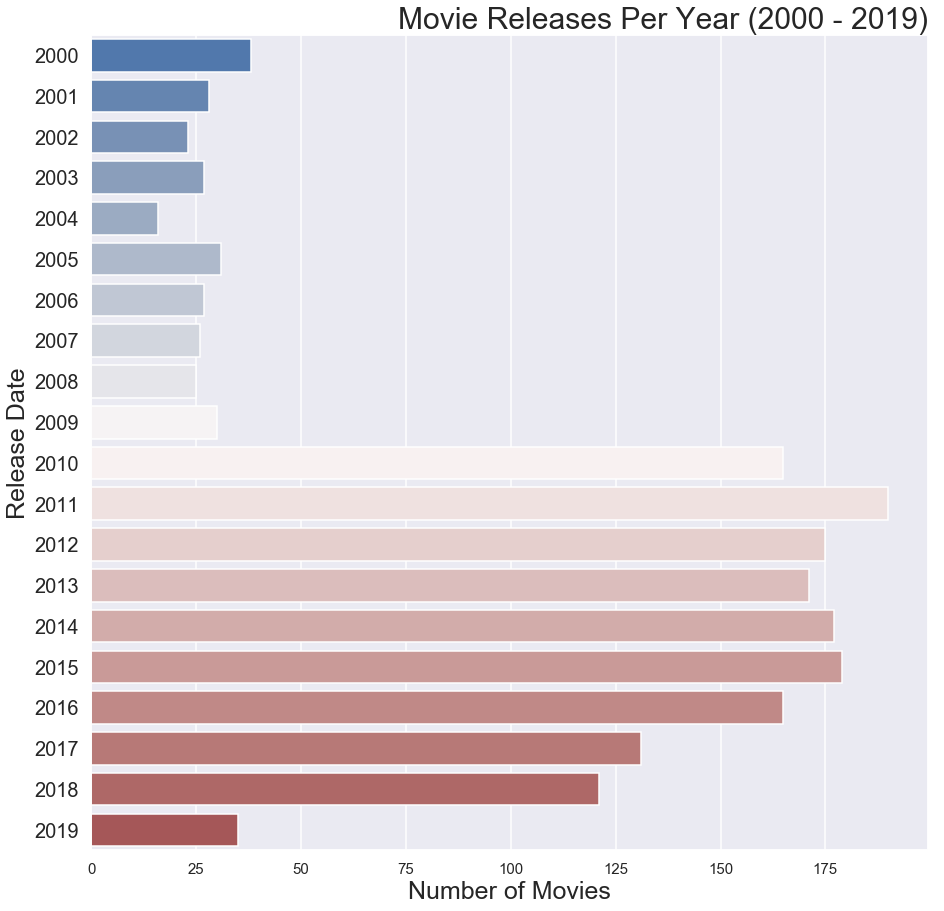

In [18]:
plt.figure(figsize=(15,15));
sns.set(context='talk')

palette = sns.light_palette("darkblue", n_colors=2)

sns.countplot(y=df_money_country_combined['release_date'].sort_values(ascending=False), palette='vlag');

plt.xlabel('Number of Movies', fontsize=25);
plt.ylabel('Release Date', fontsize=25);
plt.xticks(fontsize=15);
plt.yticks(fontsize=20);
plt.title('Movie Releases Per Year (2000 - 2019)', fontsize=30, loc='right');

## Revenue vs. Production Costs (2000 - 2019)

**At this point, I have decided to go forward with this analysis by subsetting the data as best as possible to differentiate between international and domestic movies. Although I imagine that the differences won't be immense as the worldwide_gross feature (which we will be looking at next) seems to be a very good indicator of at least how many countries a movie was released in.**

## Outlier Function

In [19]:
def between_quantile_col_cleaner(df, colname, lower_quantile, upper_quantile):
    
    '''This function\'s purpose is to address outliers in data.  This funciton
    takes in a dataframe, column name, and both lower/upper quantiles to keep
    data using the .between method.
    
    Returns:
    Dataframe
    
    Example:
    between_quantile_cleaner(df_cars, 'type', 0.05, 0.95)'''
    
    column_total = df[colname]
    
    column_remaining = column_total.between(
        column_total.quantile
        (
            lower_quantile
        ),
        column_total.quantile
        (
            upper_quantile
        ))
    df = df.iloc[column_remaining[column_remaining].index]
    print(df.shape)
    return df


In [20]:
df_money_country_combined.reset_index(inplace=True)

In [37]:
df_money_country_combined = df_money_country_combined.drop('index', axis=1)
df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
0,2009,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit,2 - 10
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit,31 - 40
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss,31 - 40
3,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit,31 - 40
4,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit,31 - 40


**Let's trim the data a bit here to reduce the outliers.**

In [22]:
df_money_country_combined_trim = df_money_country_combined

df_money_country_combined_trim = between_quantile_col_cleaner(
    df_money_country_combined_trim,
    'worldwide_gross',
    .01,
    .99)
df_money_country_combined_trim.head()
# ['country_count'].value_counts()

(1744, 12)


,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,804600000.0,635063875.0,1.546673,Profit,31 - 40
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,107000000.0,-200237650.0,-0.572108,Loss,31 - 40
5,2017,Justice League,300000000.0,229024295.0,6.559452e+08,"['Serbia', 'Argentina', 'United States', 'Hung...",29,426920914.0,355945209.0,1.186484,Profit,21 - 30
6,2015,Spectre,300000000.0,200074175.0,8.796209e+08,"['Bulgaria', 'Portugal', 'Serbia', 'Russian Fe...",29,679546748.0,579620923.0,1.932070,Profit,21 - 30
7,2012,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,"['Slovenia', 'Lithuania', 'Uruguay', 'Japan', ...",40,636300000.0,809439099.0,2.943415,Profit,31 - 40


### Subset the Data by Domestic vs International

In [23]:
df_money_country_combined_dom = df_money_country_combined_trim[df_money_country_combined_trim['country_count'] == 1]

df_money_country_combined_int = df_money_country_combined_trim[
    (df_money_country_combined_trim['country_count'] > 1) | (
        df_money_country_combined_trim['worldwide_gross'] > (7263222.0))] 
#the above figure is from the first group question median for 2 - 10 countries

print(df_money_country_combined_dom.shape)
print(df_money_country_combined_int.shape)
df_money_country_combined_dom.describe()

(146, 12)
(1697, 12)


,release_date,production_budget,domestic_gross,worldwide_gross,country_count,foreign_gross,net_revenue,return_on_investment
count,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,146.0,1.460000e+02,1.460000e+02,146.000000
mean,2005.684932,2.781930e+07,3.120944e+07,6.253871e+07,1.0,3.132927e+07,3.471941e+07,1.223571
std,4.156845,2.814809e+07,4.562244e+07,9.835842e+07,0.0,5.504774e+07,8.227322e+07,2.825622
min,2000.000000,1.000000e+04,5.858000e+03,5.858000e+03,1.0,0.000000e+00,-6.158325e+07,-0.995665
25%,2002.250000,8.000000e+06,8.705858e+05,2.107976e+06,1.0,2.097962e+05,-5.424565e+06,-0.650160
50%,2006.000000,2.000000e+07,1.622318e+07,2.191919e+07,1.0,7.045836e+06,9.287145e+05,0.275451
75%,2008.000000,3.950000e+07,3.882997e+07,8.068082e+07,1.0,4.007373e+07,3.755038e+07,1.776023
max,2019.000000,1.380000e+08,2.336321e+08,4.984382e+08,1.0,2.894095e+08,4.084382e+08,13.811455


**Very small sample size for domestic movies.**

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


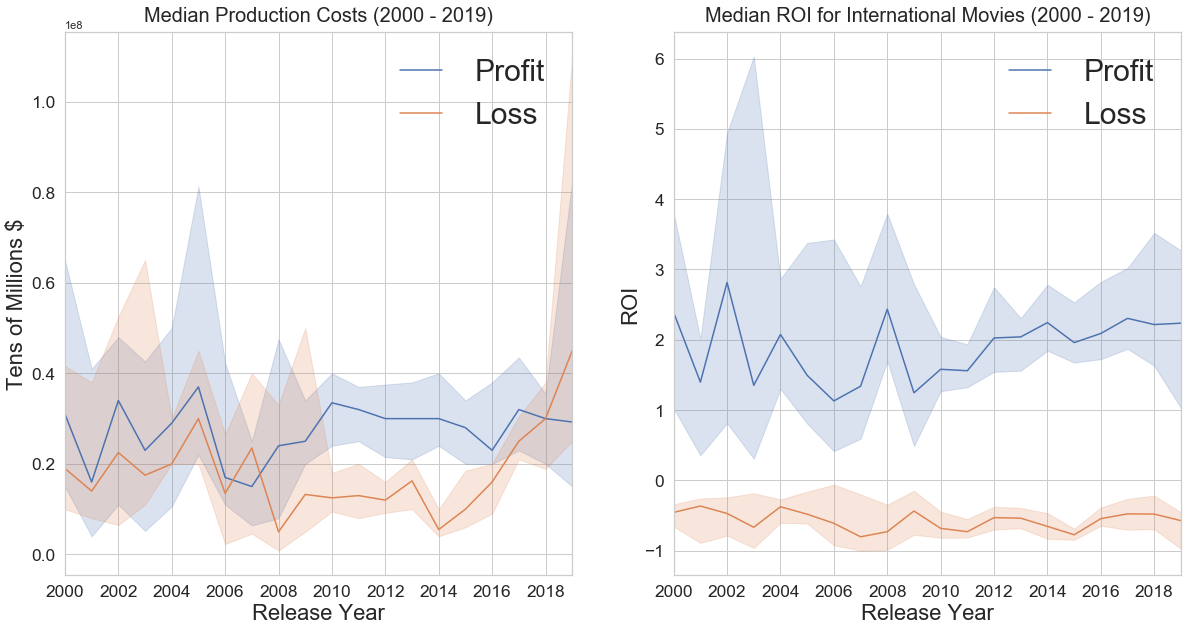

In [24]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.set(style='whitegrid')
plt.gca()

ax1 = plt.subplot(121)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True));

sns.lineplot(x='release_date',
             y='production_budget',
             data=df_money_country_combined_int,
             estimator=np.median,
             ax=ax1,
             hue='profit/loss');

plt.xlabel('Release Year', fontsize=22, axes=ax1);
plt.xlim(2000,2019);
plt.xticks(size='x-large')

plt.ylabel('Tens of Millions $', fontsize=22);
plt.yticks(size='x-large')

plt.legend(['Profit', 'Loss'], frameon=False, fontsize=30, loc='upper right', numpoints=3);
plt.title('Median Production Costs (2000 - 2019)', fontsize=20, loc='center', pad=10);


ax2 = plt.subplot(122)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True));

sns.lineplot(x='release_date',
             y='return_on_investment',
             data=df_money_country_combined_int,
             estimator=np.median,
             ax=ax2,
             hue='profit/loss');

plt.xlabel('Release Year', fontsize=22);
plt.xlim(2000,2019);
plt.xticks(size='x-large')

plt.ylabel('ROI', fontsize=22);
plt.yticks(size='x-large')

plt.legend(['Profit', 'Loss'], frameon=False, fontsize=30, loc='upper right', numpoints=3);
plt.title('Median ROI for International Movies (2000 - 2019)', fontsize=20, loc='center', pad=10);

**The international movies that made a profit seem to have relatively stable costs over the past 10 years at least, while we see the movies at a loss are steadily climbing. Regarding ROI, there is some fluctuation to observe, but both movies that profit and lose seem to do so at the same rate, with the movies that profit showing a bit of an upward trend.  This the kind of insight that we were looking for. Let's have one more closer look at whats been happening since around 2008 as we have much more data after that, and there seems to be more stability after that year.**

### Subset Data for Post-2008 Productions

In [40]:
df_money_country_combined_int_2008_onward = df_money_country_combined_int[
    df_money_country_combined_int[
        'release_date'] >= 2008]
df_money_country_combined_int_2008_onward.describe()

,release_date,production_budget,domestic_gross,worldwide_gross,country_count,foreign_gross,net_revenue,return_on_investment
count,1507.000000,1.507000e+03,1.507000e+03,1.507000e+03,1507.000000,1.507000e+03,1.507000e+03,1507.000000
mean,2013.685468,4.352598e+07,5.281762e+07,1.298973e+08,22.221632,7.707968e+07,8.637132e+07,3.030155
std,2.707144,5.279182e+07,7.104501e+07,1.929286e+08,9.686863,1.291990e+08,1.555677e+08,12.482808
min,2008.000000,9.000000e+03,3.880000e+02,4.584000e+03,1.000000,0.000000e+00,-2.002376e+08,-0.998782
25%,2011.000000,9.300000e+06,5.762105e+06,1.238834e+07,16.000000,3.347353e+06,-7.819100e+04,-0.033220
50%,2014.000000,2.500000e+07,2.879598e+07,5.440420e+07,24.000000,2.244575e+07,2.549351e+07,1.241864
75%,2016.000000,5.500000e+07,6.650710e+07,1.543725e+08,29.000000,8.449448e+07,1.014829e+08,3.073086
max,2019.000000,4.106000e+08,5.321773e+08,1.110527e+09,46.000000,8.586000e+08,9.597278e+08,415.564740


In [41]:
df_money_country_combined_int_2008_onward.groupby('profit/loss').median()

,release_date,production_budget,domestic_gross,worldwide_gross,country_count,foreign_gross,net_revenue,return_on_investment
profit/loss,,,,,,,,
Loss,2013,14000000.0,1799322.0,4563080.0,15,1117898.0,-6206261.0,-0.591481
Profit,2014,30000000.0,43686509.0,88652613.0,26,43307198.5,53713120.0,2.003155


C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


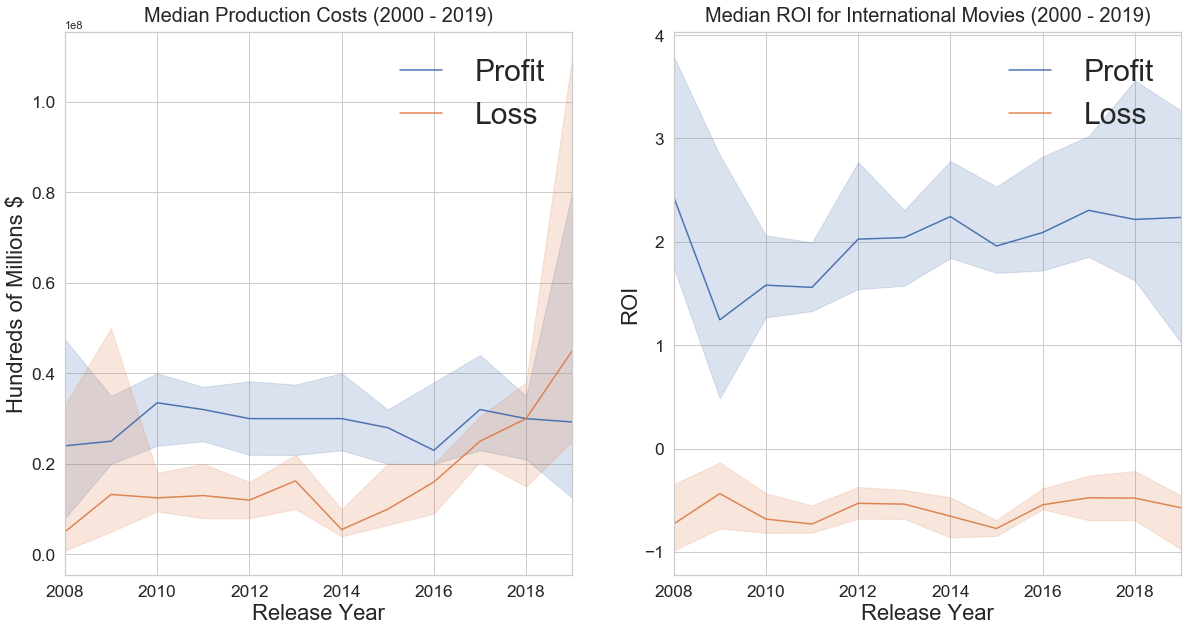

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.set(style='whitegrid')
plt.gca()

ax1 = plt.subplot(121)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True));

sns.lineplot(x='release_date',
             y='production_budget',
             data=df_money_country_combined_int_2008_onward,
             estimator=np.median,
             ax=ax1,
             hue='profit/loss');

plt.xlabel('Release Year', fontsize=22, axes=ax1);
plt.xlim(2008,2019);
plt.xticks(size='x-large')

plt.ylabel('Hundreds of Millions $', fontsize=22);
plt.yticks(size='x-large')

plt.legend(['Profit', 'Loss'], frameon=False, fontsize=30, loc='upper right', numpoints=3);
plt.title('Median Production Costs (2000 - 2019)', fontsize=20, loc='center', pad=10);


ax2 = plt.subplot(122)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True));

sns.lineplot(x='release_date',
             y='return_on_investment',
             data=df_money_country_combined_int_2008_onward,
             estimator=np.median,
             ax=ax2,
             hue='profit/loss');

plt.xlabel('Release Year', fontsize=22);
plt.xlim(2008,2019);
plt.xticks(size='x-large')

plt.ylabel('ROI', fontsize=22);
plt.yticks(size='x-large')

plt.legend(['Profit', 'Loss'], frameon=False, fontsize=30, loc='upper right', numpoints=3);
plt.title('Median ROI for International Movies (2000 - 2019)', fontsize=20, loc='center', pad=10);

**As we observe the left plot above, it confirms what we saw in the previous plot, that there is a large gap between production costs for movies that profit vs. flop. Does this tell us something about how much a movie needs to cost before it can be profitable? It is worth noting as well that there is a clear increase in costs for movies that turned a loss since 2014. What has been happening in the industry since then that led to this increase?**

**A look at the right plot shows a similar relationship existing between the ROI of these two movie types as well.  Movies either seem to make back their entire cost back as revenue and some, or lose at least half to all of their original investment, quite the contrast!** 

# Recap

**1. The first observation we made was that there are still many more movies that profit rather than lose money.  This was important as it set the stage for the overall industry, noting that the odds are still in the favour or profit.**  

**2. Then we checked out the distribution of the data available for movies over the years.  We saw a very large increase in data available for movies made around the year 2010.**

**3. We then subset the data to look at the past 20 years to get an idea of what kinds of trends over time we can see regarding movies that were either profits or losses.  After some further outlier cleaning, we have were able to see that there seems to be a plateau in production costs for movies that turn profit, since around 2010.  This needs to be investigated further but my intuition tells me that the competition from "non-Hollywood" movie producers forced the traditional businesses in industry to "lean out". Perhaps online advertising became more prolific, reducing  costs for their marketing efforts?**

**4. We also noticed an increase in production costs since 2014 for movies that flopped.  Were companies that were losing money trying to fill the financial gap that previously existed there? Where was that moeny being spent within those budgets?  More research is required to answer this question.**

**5. Finally, we took a closer look at the movies from just the past 10 years, where we have the bulk of our data.  The same trends were apparent, though these 'profit/flop-barriers' became more noticeable.**


# Conclusions

**What does this tell us about why some international movies fail?**

**We have seen that that profitable movies spend about US 30,000,000 where as those that result in a loss spend around US 14,000,000.  We also noted that the ROI distinction between movies that profit and loss are quite large.  Either the movie tends to be a big success, with a median ROI of 2, or they are a flop with a median ROI of -0.6.**

**The observations related to movies that lost money, increasing their production costs since 2014 is also noteworthy, as it may be the case that simply throwing money into a movie does not have a positive result.  It may be much more about the distribution of where these costs go (directors vs actors, CGI vs real props, etc.) that determines its success.**

**In conclusion, we seem to see a production costs value, US 30,000,000, above which, movies tend to make a positive return, with a median of 2, on their investments. This is the tipping point that we were looking for, but this is by no means a conclusive showing. Further digging into what is comprised within these costs would provide valuable insights into which areas should be streamlined, as we have seen that just crossing this threshold is not enough to make a movie an international success.**

# Future Work Recommendations

**- Having a much closer look at what happened with data collection techniques, movie industry marketing efforts, and social media trends from the years 2008 - 2012.  This is to get a better idea of what was happening in the industry when its production costs seem to have flattened out.**

**- More information about the nature of the streaming industry would be an excellent contrast from the perspective of production costs and the traditional Hollywood film making process.  Does that new business model have a similar relationship as observed above? Or does their lean business model allow them to break into the ROI no-mans-land that we previously observed, resulting in consistent returns with lower risks for production costs.**